## Importing Libraries

In [15]:
#Implementation of Incremental Mathematical Stream Regression
from sklearn import metrics  #importing datasets and metrics from the sklearn library
import pandas as pd
import numpy as np  

## Loading Dataset

In [16]:
testdataframe=pd.read_csv("H:/AOBD/boston.csv",header=None)  #load dataset from laptop
testdataarray=testdataframe.values  #convert the dataframe to array
X_test=testdataarray[400:506,:-1]  #separate the last 106 datapoints from data for test dataset
y_test=testdataarray[400:506,-1]  #separate the last 106 datapoints output variable for test dataset

## Python Data Generator

In [17]:
def myGeneratorfun(wsize=100):
    print("In myGeneratorfun:")
    counter=0  #counter to stop stream data after all data is used
    for chunk in pd.read_csv('H:/AOBD/boston.csv', header=None, chunksize=wsize):  #for loop to separate out data in chunks
        print("In for loop, counter vlaue is", counter)
        chunk_array=chunk.values  #Each chunk of data is equal to window size and convert it to array
        counter=counter+1  #increment counter by 1 know that one more chunk of data is used
        yield (chunk_array[:,:-1], chunk_array[:,-1])  #This yield statement returns chunk of data 
        if counter >= 4:  #the for loop will continue to send chunks of data till the if statement is not satisfied
            break  #after all the data is used as chunks


## Implementation of IMSR:

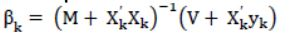

In [18]:
myGenerator = myGeneratorfun(100)  #Call the data Generator with window size=100

M=np.zeros((X_test.shape[1],X_test.shape[1])) #initialize M matrix with p*p shape (p=no. of variables)
V=np.zeros((X_test.shape[1]))  #initialize V vector with p*1 shape
Beta=np.zeros(X_test.shape[1]) #initialize Beta i.e. the parameters vector with p*1 shape

for (x,y) in myGenerator:  #Call for each chunks in a for loop one by one
        
    try:
        XTXi=inv(M + np.dot(x.T,x)) # Applying the first half of IMSR equation where M is the XTX till the last window
    except LinAlgError:
        XTXi=pinv(M + np.dot(x.T,x)) # This part if XTXi is not invertible
    
    
    
    XTy=np.dot(x.T,y)    #XTy for the current window
    
    Beta=np.dot(XTXi,(V + XTy)) # For Beta with pre-synopis, add V with current window XTy, V is the XTy till last window
    M=M+np.dot(x.T,x) #Update M with adding XTXi(for this window) with all previous windows XTX
    V=V+XTy  #Update V with adding XTy(for this window) with all previous windows XTy

    #print("Betas:", Beta)
    #print("Betas Shape:", Beta.shape)   

    predictions=np.dot(Beta,X_test.T) #Do predictions for test data using the parameters predicted till kth window
    print(predictions.shape)
    print("MAE:", metrics.mean_absolute_error(y_true=y_test,y_pred=predictions)) #Print MAE
    print("MSE:", metrics.mean_squared_error(y_true=y_test,y_pred=predictions))  #Print MSE

In myGeneratorfun:
In for loop, counter vlaue is 0
(106,)
MAE: 37.06295081928023
MSE: 3203.3553111371266
In for loop, counter vlaue is 1
(106,)
MAE: 16.47581761737682
MSE: 481.31853520782573
In for loop, counter vlaue is 2
(106,)
MAE: 12.115488484864573
MSE: 318.8659342098796
In for loop, counter vlaue is 3
(106,)
MAE: 5.13113482197375
MSE: 37.17286563527912
